# Imports

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare,chi2_contingency

# The Dataset

In [105]:
df = pd.read_excel("../../../data/Telco_customer_churn.xlsx")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [119]:
(df.loc[0:2]['Total Charges']).dtype

dtype('O')

In [ ]:
df['Total Charges']

In [116]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

# Data Cleaning

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

* Data-types transformation:

In [63]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors = 'coerce')

* Dropping null-valued rows:

In [64]:
df.dropna(subset = ['Total Charges'], inplace = True)

In [65]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5163
dtype: int64

Now our dataset essentially contains no nulls. The feature `Churn Reason` contains values only where `Churn Label == Yes`. This shall be handled later.

* Checking unique values:

In [66]:
for i in df:
    print(i, df[i].nunique(), df[i].unique())

CustomerID 7032 ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Count 1 [1]
Country 1 ['United States']
State 1 ['California']
City 1129 ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Zip Code 1652 [90003 90005 90006 ... 96134 96146 95569]
Lat Long 1652 ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']
Latitude 1652 [33.964131 34.059281 34.048013 ... 41.813521 39.191797 40.363446]
Longitude 1651 [-118.272783 -118.30742  -118.293953 ... -121.492666 -120.212401
 -123.835041]
Gender 2 ['Male' 'Female']
Senior Citizen 2 ['No' 'Yes']
Partner 2 ['No' 'Yes']
Dependents 2 ['No' 'Yes']
Tenure Months 72 [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 3

* Aggregating categories of some features for simpler, more meaningful data:

In [9]:
for i in df.columns:
    if "No phone service" in df[i].unique():
        df[i].replace(["No phone service"],["No"],inplace=True)
    elif "No internet service" in df[i].unique():
        df[i].replace(["No internet service"],["No"],inplace=True)

C:\Users\sanid\AppData\Local\Temp\ipykernel_16392\1516949102.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "No phone service" in df[i].unique():
C:\Users\sanid\AppData\Local\Temp\ipykernel_16392\1516949102.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif "No internet service" in df[i].unique():


In [68]:
df.nunique()

CustomerID           7032
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          72
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3435
Churn Reason           20
dtype: int64

In [69]:
df['Multiple Lines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

# Exploratory Data Analysis

* Correlation heatmap (numerical features):

In [10]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

<Axes: >

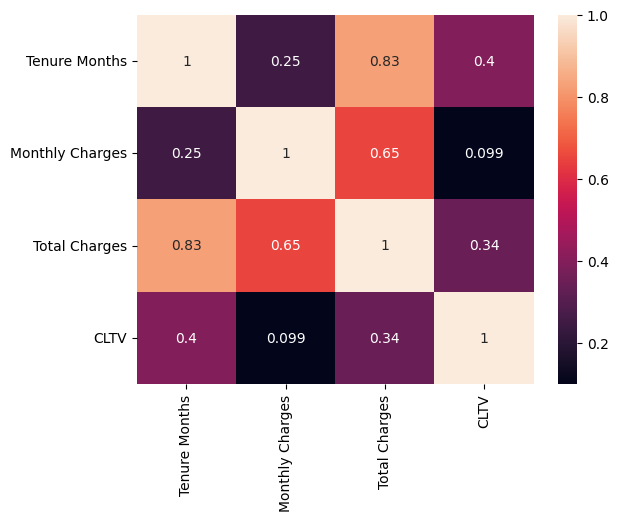

In [14]:
sns.heatmap(df[numeric_cols].corr(), annot = True)

In [12]:
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

* Checking balance in target class:

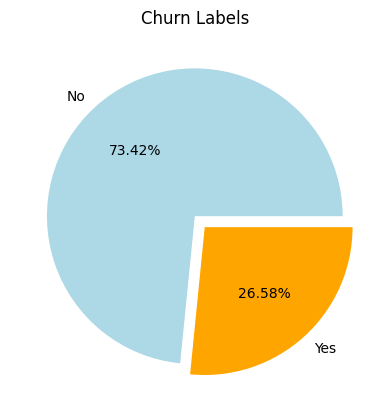

In [13]:
plt.pie(df["Churn Label"].value_counts(), labels = df["Churn Label"].value_counts().index, explode = [0,0.1], autopct="%.2f%%",colors = ['lightblue', 'orange'])
plt.title('Churn Labels')
plt.show()

From above we can see that the customer churn is evenly distributed among the genders.

In [15]:
numeric_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

#### Box-Plot for Numeric Features

c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


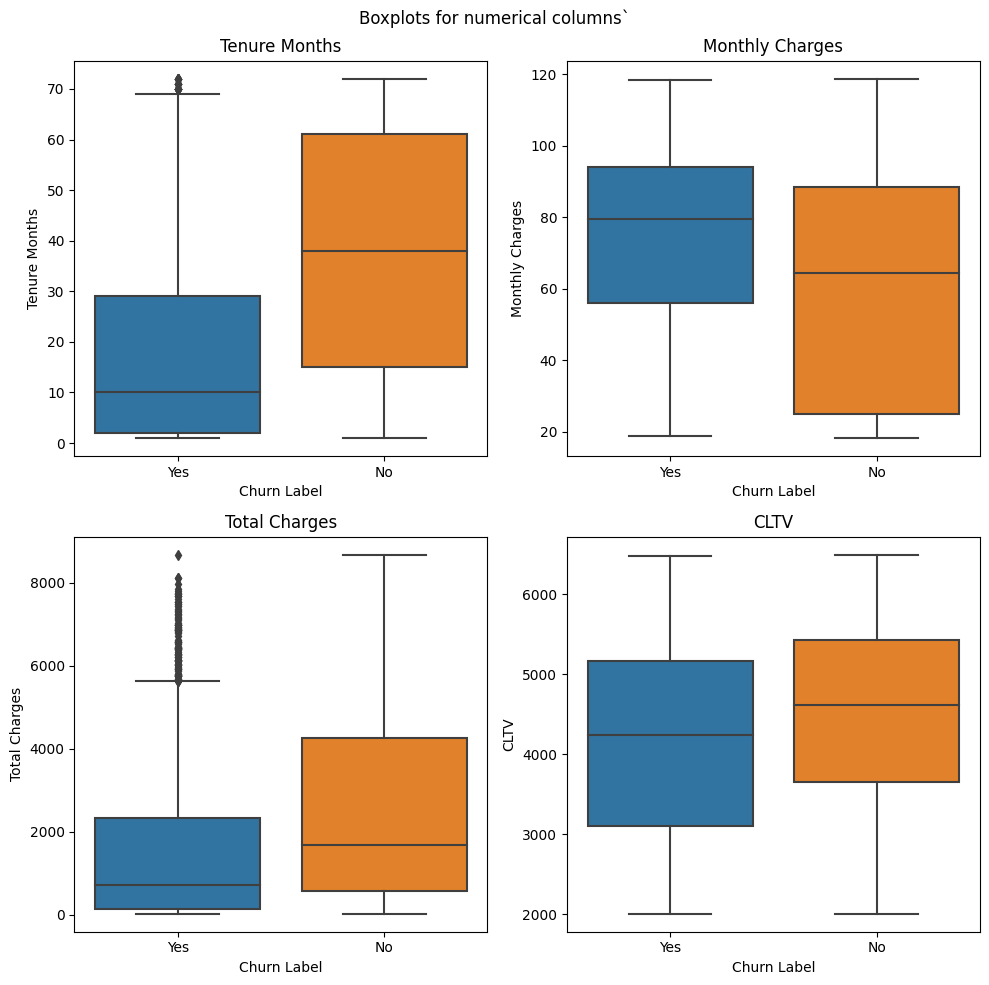

In [16]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
axes = axes.flatten()
fig.suptitle("Boxplots for numerical columns`")
for i in range(len(numeric_cols)):
    ax = axes[i]
    sns.boxplot(x= df['Churn Label'], y = df[numeric_cols[i]],ax=ax)
    ax.set_title(numeric_cols[i])
plt.tight_layout()

#### Numeric Features v/s Churn Label

c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


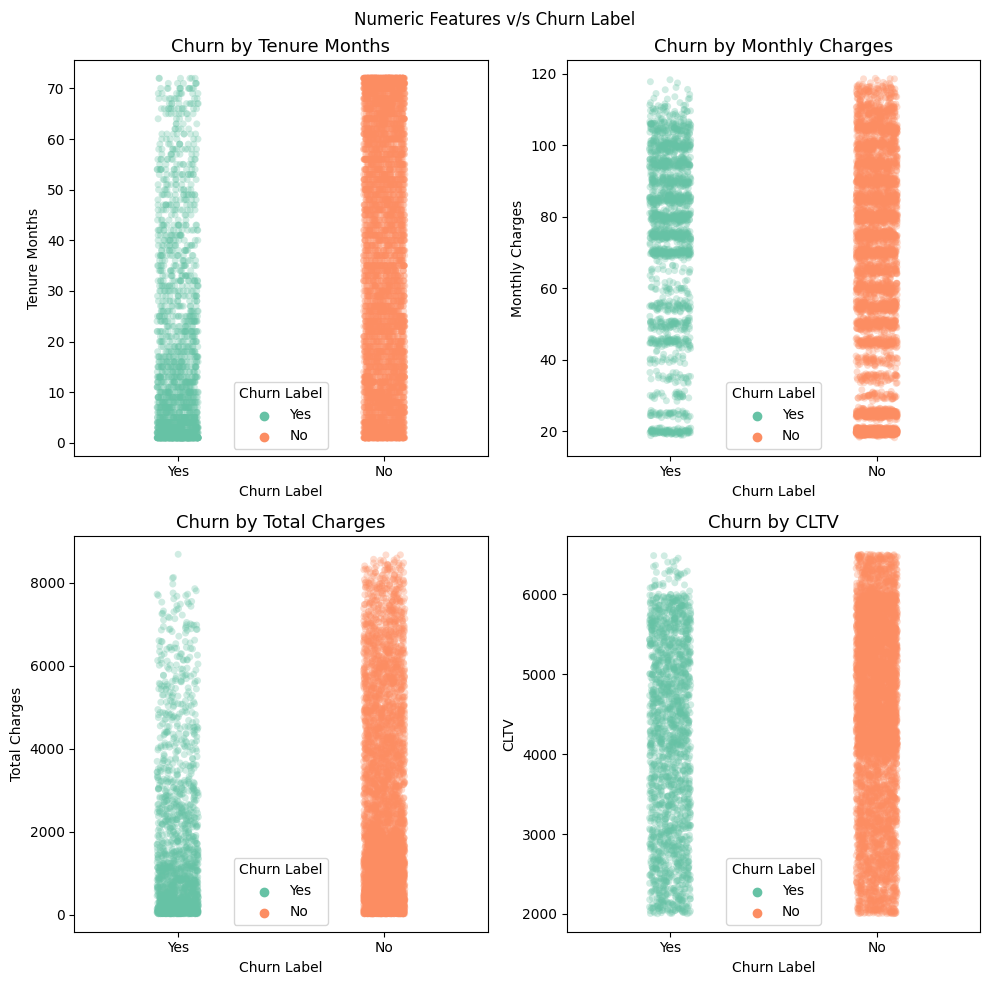

In [17]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
axes = axes.flatten()
fig.suptitle('Numeric Features v/s Churn Label')
for i,col in enumerate(numeric_cols):
    ax = axes[i]
    sns.stripplot(data = df, x = 'Churn Label',y = col, hue = 'Churn Label', ax = ax, palette = 'Set2', alpha = 0.3)
    ax.set_title(f'Churn by {col}', fontsize = 13)
    plt.tight_layout()

#### Histogram of Numeric Features

C:\Users\sanid\AppData\Local\Temp\ipykernel_16392\712256686.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


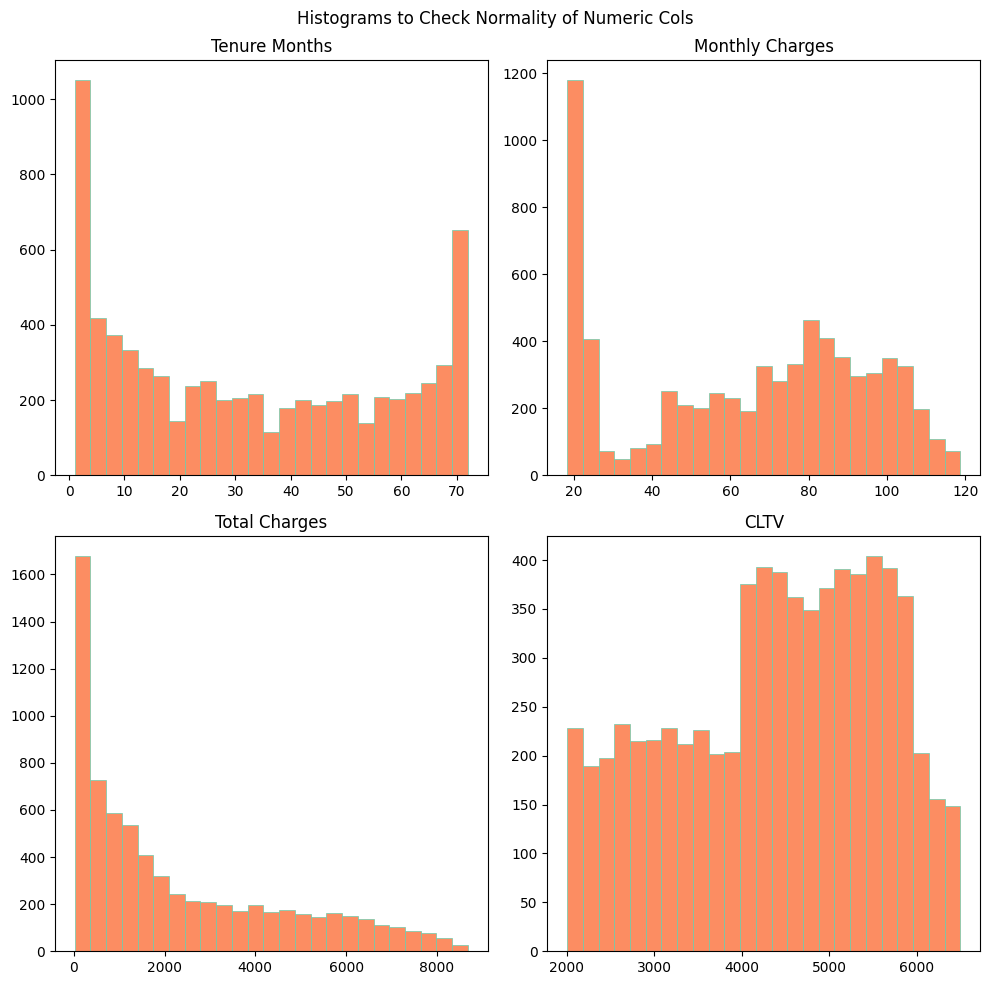

In [18]:
fontsz = 3
fig, axes = plt.subplots(2,2, figsize =(10,10))
axes = axes.flatten()
fig.suptitle('Histograms to Check Normality of Numeric Cols')

for i,col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(df[col], bins = 25, facecolor = '#FC8D62', edgecolor='#6BCCAC', linewidth=0.5)
    ax.set_title(col)
    plt.tight_layout()

In the histogram of Tenure Months, we can observe that a chunk of the customers are new customers. 
Another chunk of customers have been with the company for more than 70 months. 
These are the High value customers.

There are also 3 types of Contracts, lets check the disparisity.

<Axes: xlabel='Contract'>

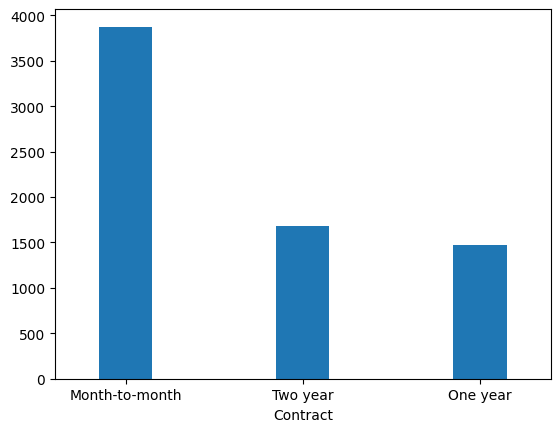

In [19]:
#Tenure of customers based on Contract types
df['Contract'].value_counts().plot.bar(rot = 0, width = 0.3)

We can also see from above that a lot of customers were on a month to month contract rate.

C:\Users\sanid\AppData\Local\Temp\ipykernel_16392\1807626930.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  splt = sns.distplot(df[df['Contract']==col]['Tenure Months'],ax = ax)
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

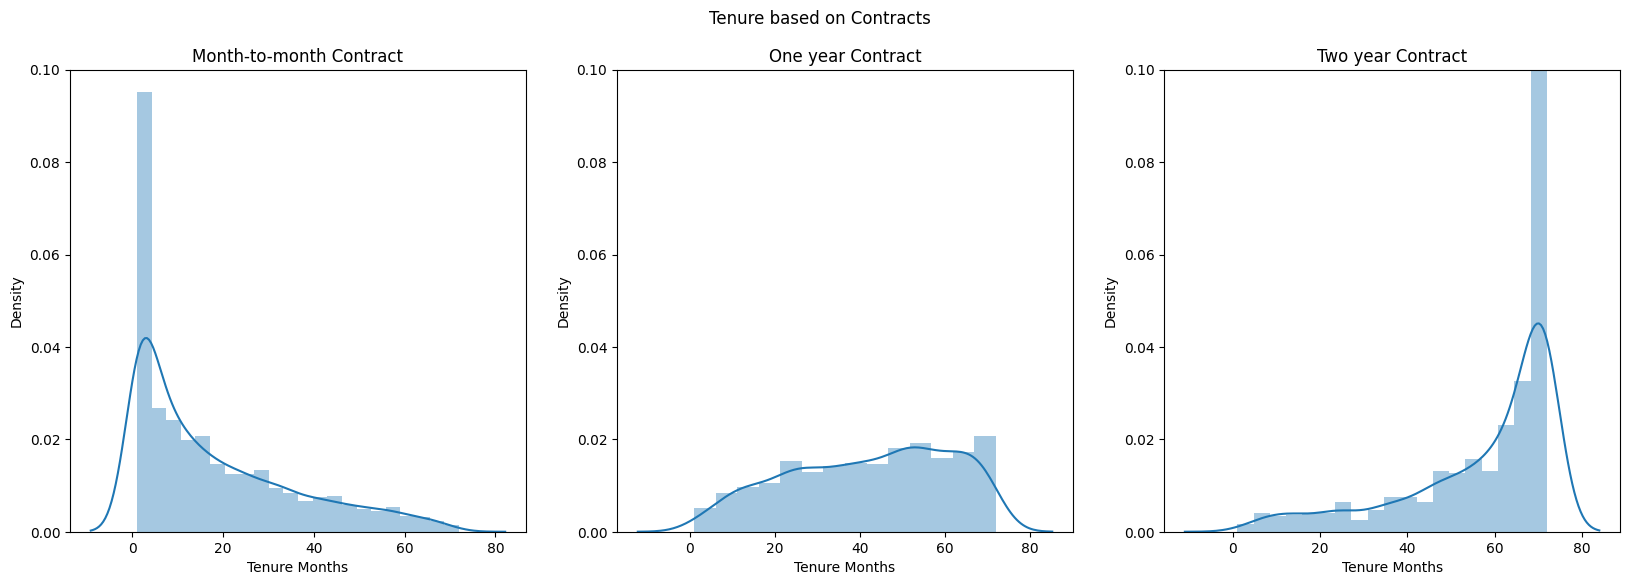

In [20]:
fig, axes = plt.subplots(1,3, figsize = (20,6))
axes = axes.flatten()
fig.suptitle('Tenure based on Contracts')
contracts = ['Month-to-month', 'One year', 'Two year']

for i, col in enumerate(contracts):
    ax = axes[i]
    splt = sns.distplot(df[df['Contract']==col]['Tenure Months'],ax = ax)
    splt.set_ylim(0,.1)
    ax.set_title(f'{col} Contract')

We can see that most of the new customers have opted for a month to month contract while the Long time customes have opted for Two Year Contracts.

#### Scatter plot of Monthly Charges v/s Total Charges

c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Monthly Charges', ylabel='Total Charges'>

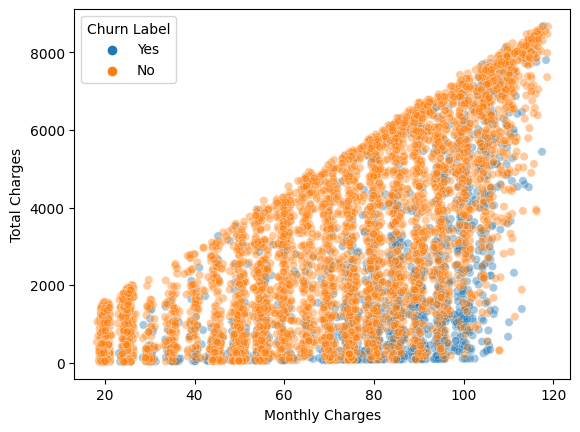

In [21]:
sns.scatterplot(df[['Total Charges','Monthly Charges', 'Churn Label']], x = 'Monthly Charges', y= 'Total Charges',hue= 'Churn Label', alpha = 0.4)

#### KDE Plot of Total Charges

C:\Users\sanid\AppData\Local\Temp\ipykernel_16392\512521808.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[df['Churn Label']=='Yes']['Total Charges'], shade = True)
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sanid\AppData\Local\Temp\ipykernel_16392\512521808.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v

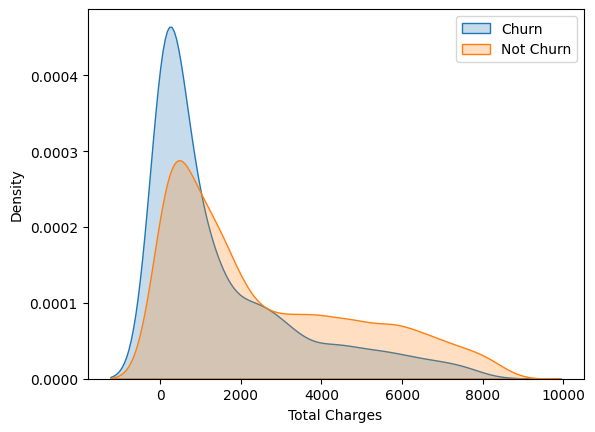

In [22]:
ax = sns.kdeplot(df[df['Churn Label']=='Yes']['Total Charges'], shade = True)
ax = sns.kdeplot(df[df['Churn Label']== 'No']['Total Charges'], shade = True)
ax.legend(['Churn', 'Not Churn'])

More customer churn can be observed in people with lower charges as most of the customers are only short time customers.

We can also see that lower churn can be observed in higher total charges as Higher total charge corrosponds to old HIGH VALUE customers.

#### KDE Plot of Monthly Charges

C:\Users\sanid\AppData\Local\Temp\ipykernel_16392\560352007.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df[df['Churn Label']=='Yes']['Monthly Charges'], shade = True)
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sanid\AppData\Local\Temp\ipykernel_16392\560352007.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn

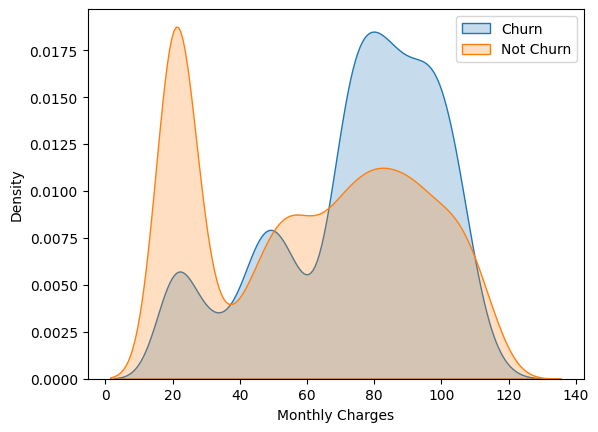

In [23]:
ax = sns.kdeplot(df[df['Churn Label']=='Yes']['Monthly Charges'], shade = True)
ax = sns.kdeplot(df[df['Churn Label']== 'No']['Monthly Charges'], shade = True)
ax.legend(['Churn', 'Not Churn'])

We can see from the above KDE plot that customers with higher monthly charge tend to churn more compared to those with lower charges.

#### Categorical Pie Charts

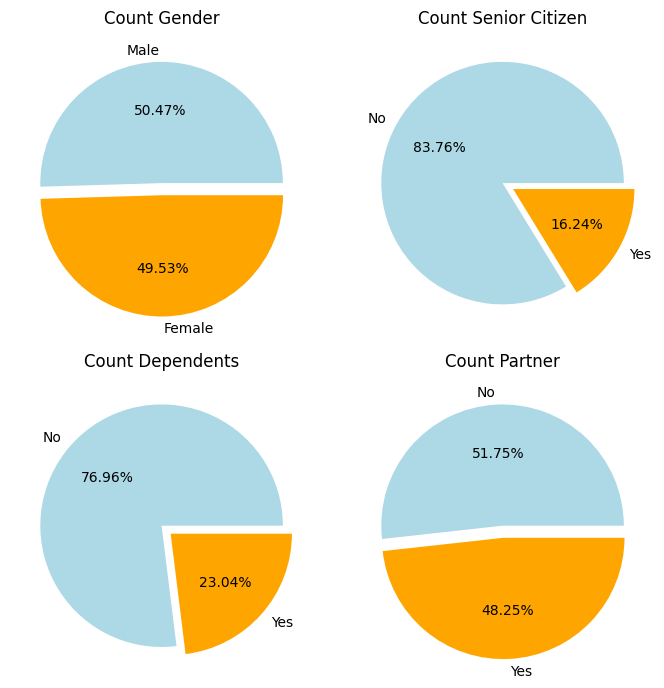

In [24]:
pie_cols =  ['Gender', 'Senior Citizen', 'Dependents', 'Partner']

fig, axes = plt.subplots(2,2, figsize = (7,7))
axes = axes.flatten()
# fig.suptitle('pie charts')
for i,col in enumerate(pie_cols):
    ax = axes[i]
    count_df = df[col].value_counts()
    ax.pie(count_df, labels = count_df.index, explode = [0,0.1], autopct = '%.2f%%', colors=['lightblue', 'orange'])
    ax.set_title(f'Count {col}')
plt.tight_layout()

#### Checking Genderwise Expenditure

c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Gender vs Total Charges')

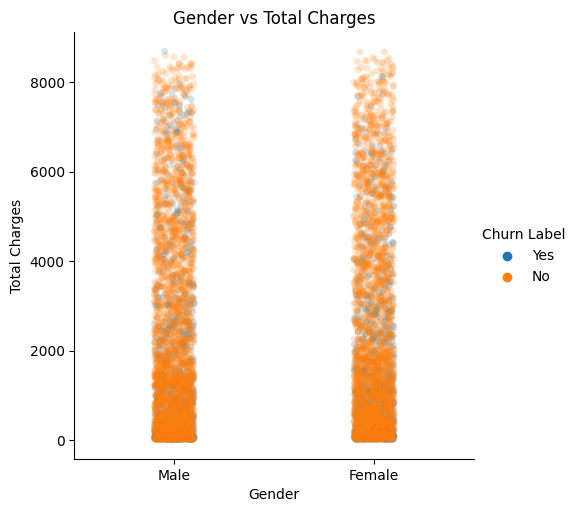

In [25]:
sns.catplot(data=df,x="Gender",y="Total Charges",hue="Churn Label",jitter=True,alpha=0.2)
plt.title('Gender vs Total Charges')

% of Males and Females are almost the same in our data. Also, there exist little to no disparity between male and female expenditure.

#### Exploring Partners, Dependents variables

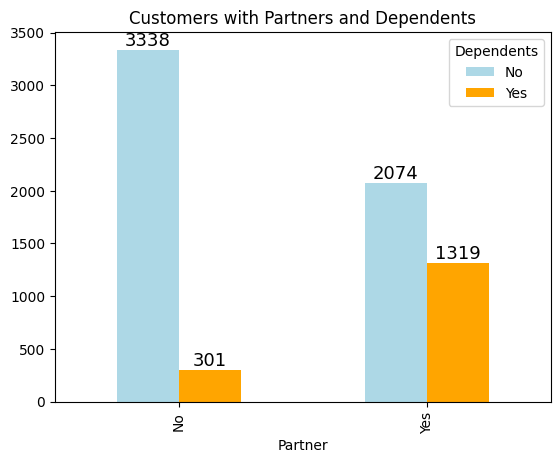

In [26]:
ax = df.groupby(['Partner', 'Dependents']).size().unstack().plot.bar(color=['lightblue','orange'])
plt.title('Customers with Partners and Dependents')
for i in ax.containers:
        ax.bar_label(i, fontsize = 13)

#### Visualizing all Categorical Variables v/s Churn Label

c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


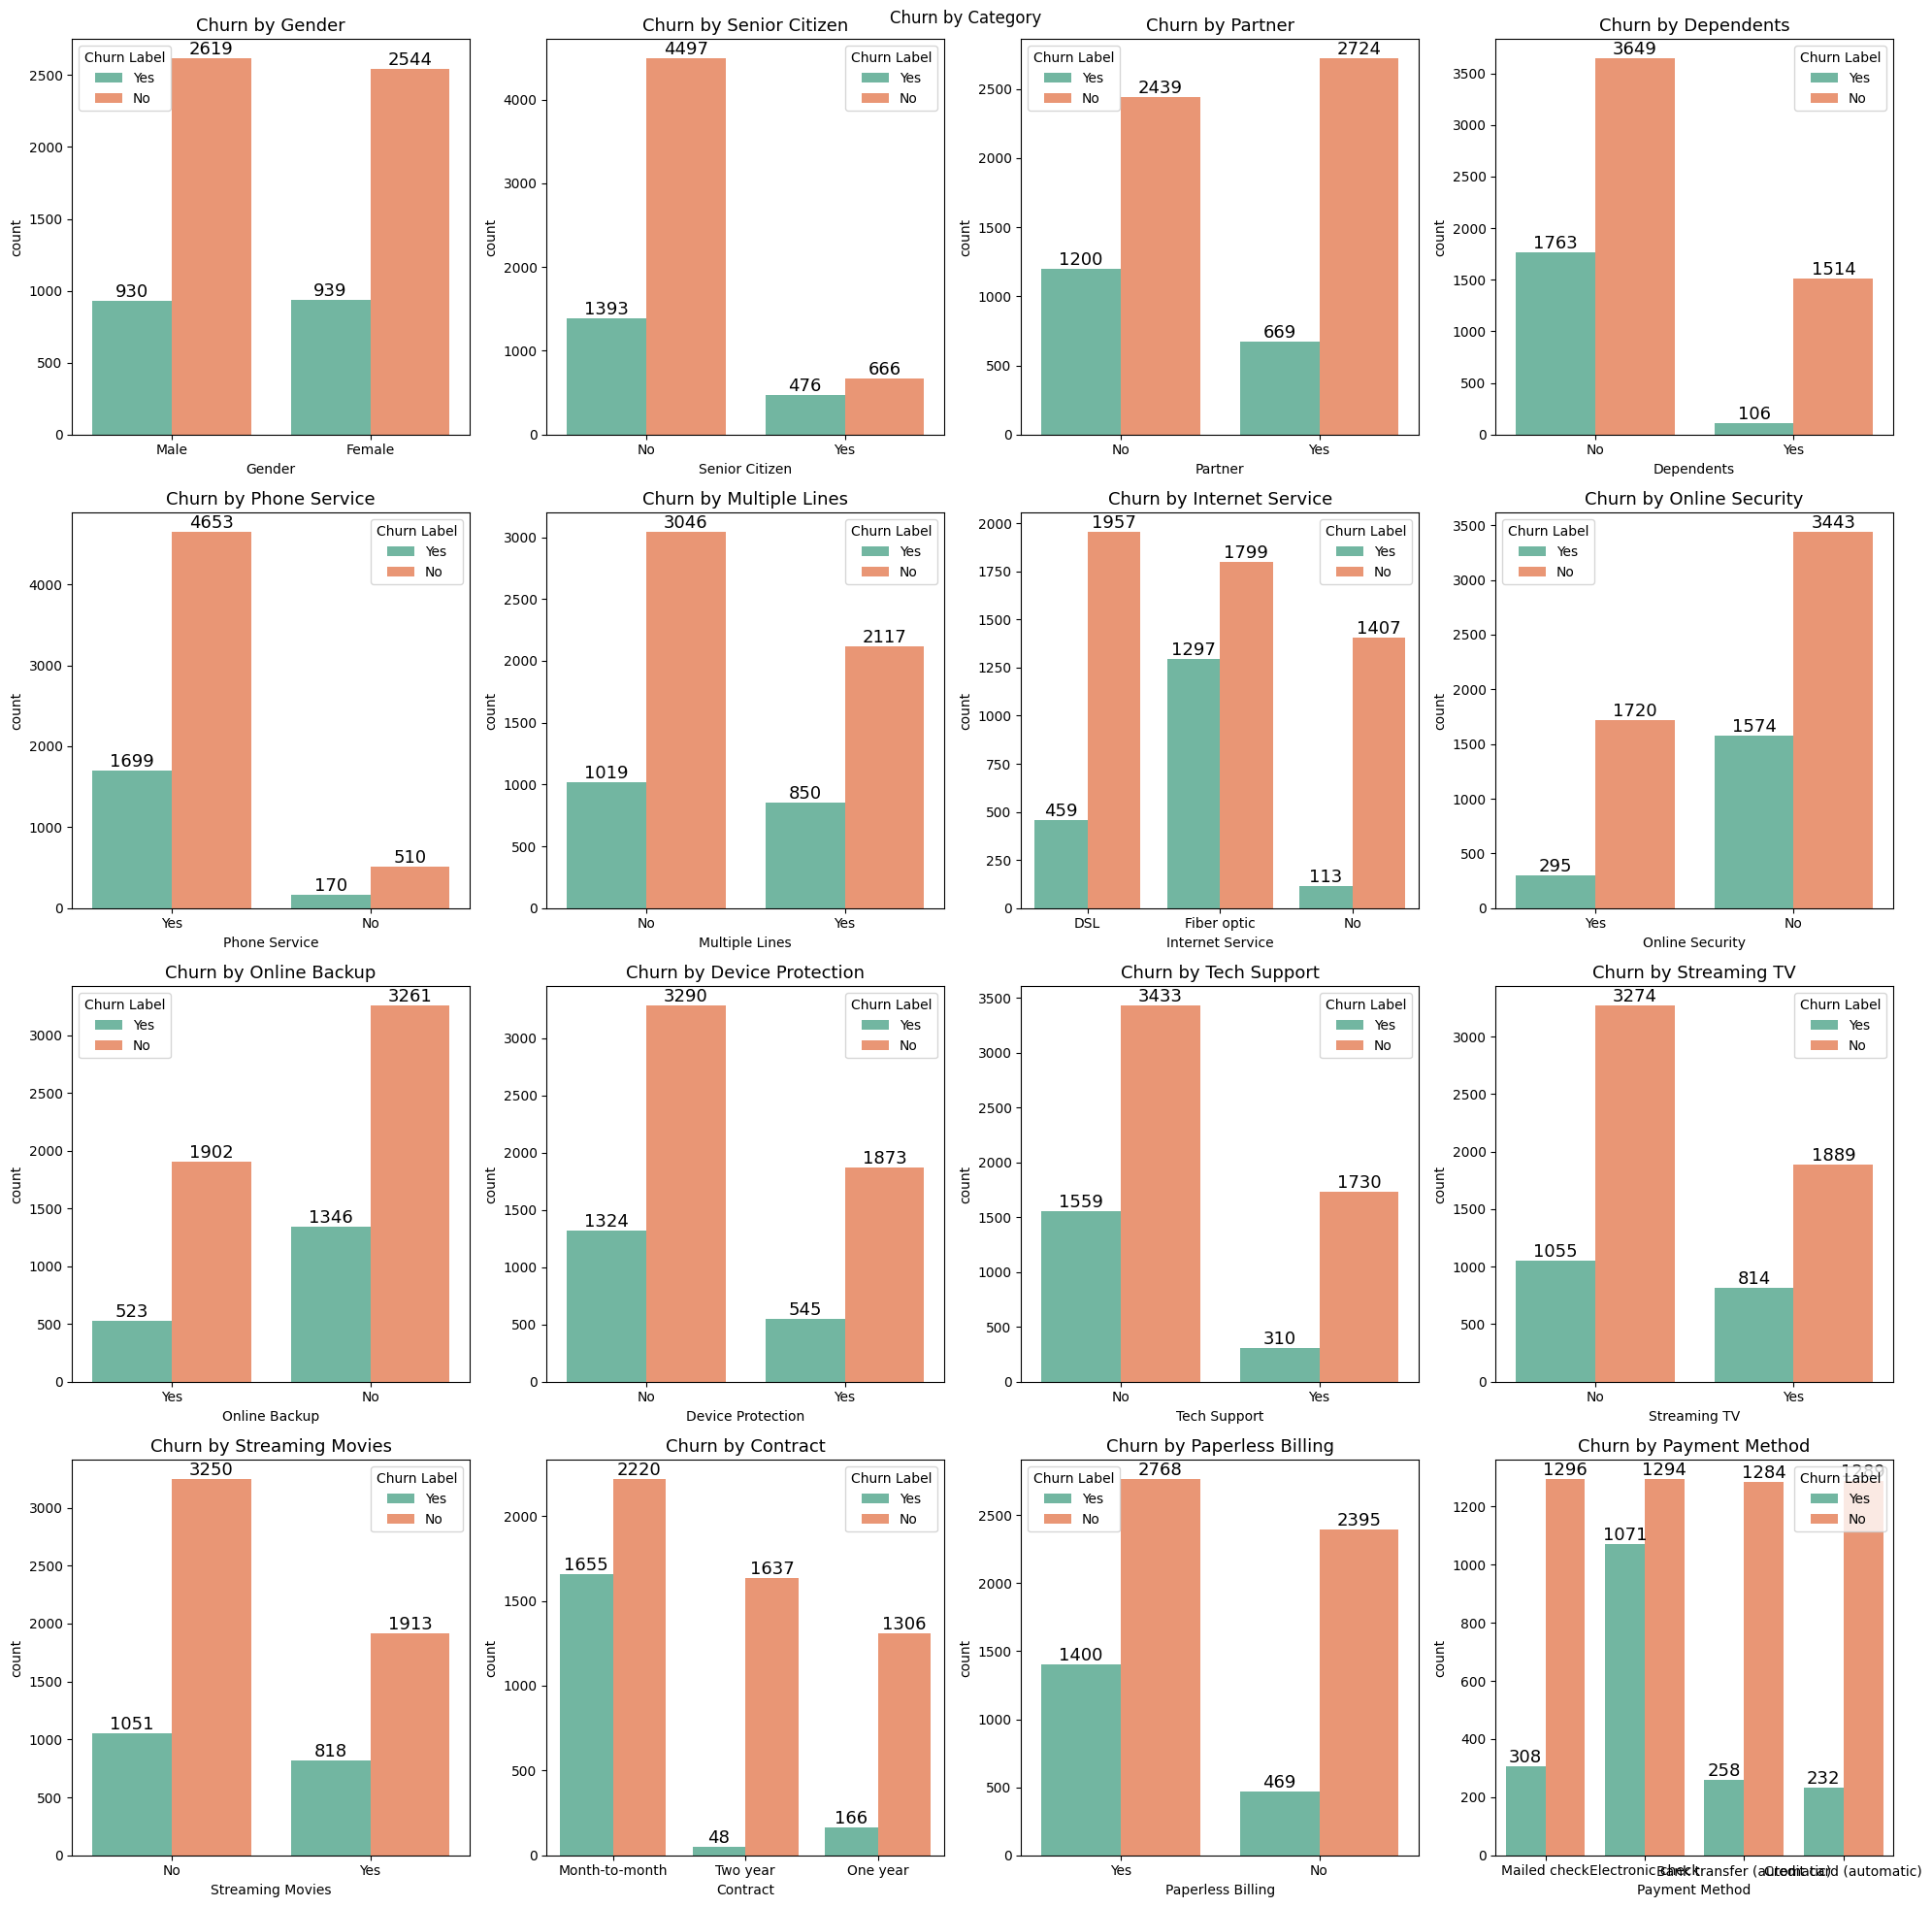

In [27]:
cateogorical_columns =  ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
cat_df = df[cateogorical_columns]

fig, axes = plt.subplots(4,4, figsize = (20,20))
axes = axes.flatten()
fig.suptitle("Churn by Category")
for i, col in enumerate(cat_df.columns):
    ax = axes[i]
    sns.countplot(data = df, x = col, hue = 'Churn Label', ax = ax, palette="Set2")
    ax.set_title(f"Churn by {col}", fontsize = 13)
    plt.tight_layout(pad = 0.6)

    for i in ax.containers:
        ax.bar_label(i, fontsize = 13)

plt.tight_layout()

#### Now we will see the disparity in customer churn, by comparing those customers who have

-   Opted for ONLY Phone Service
-   Opted for ONLY Internet connection
-   Opted for BOTH Phone and Internet Service

In [28]:
df[df["Phone Service"]=="No"]["Internet Service"].value_counts()

Internet Service
DSL    680
Name: count, dtype: int64

In [29]:
df.groupby(["Phone Service","Churn Label"])["Churn Label"].count()

Phone Service  Churn Label
No             No              510
               Yes             170
Yes            No             4653
               Yes            1699
Name: Churn Label, dtype: int64

In [30]:
# Only phone service, Only Internet service, Both 
phone_only_df = df[(df['Phone Service'] =='Yes') & (df['Internet Service'] =='No')]
internet_only_df = df[(df['Phone Service'] =='No') & (df['Internet Service'] !='No')]
internet_and_phone_df =  df[(df['Phone Service'] =='Yes') & (df['Internet Service'] !='No')]

c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


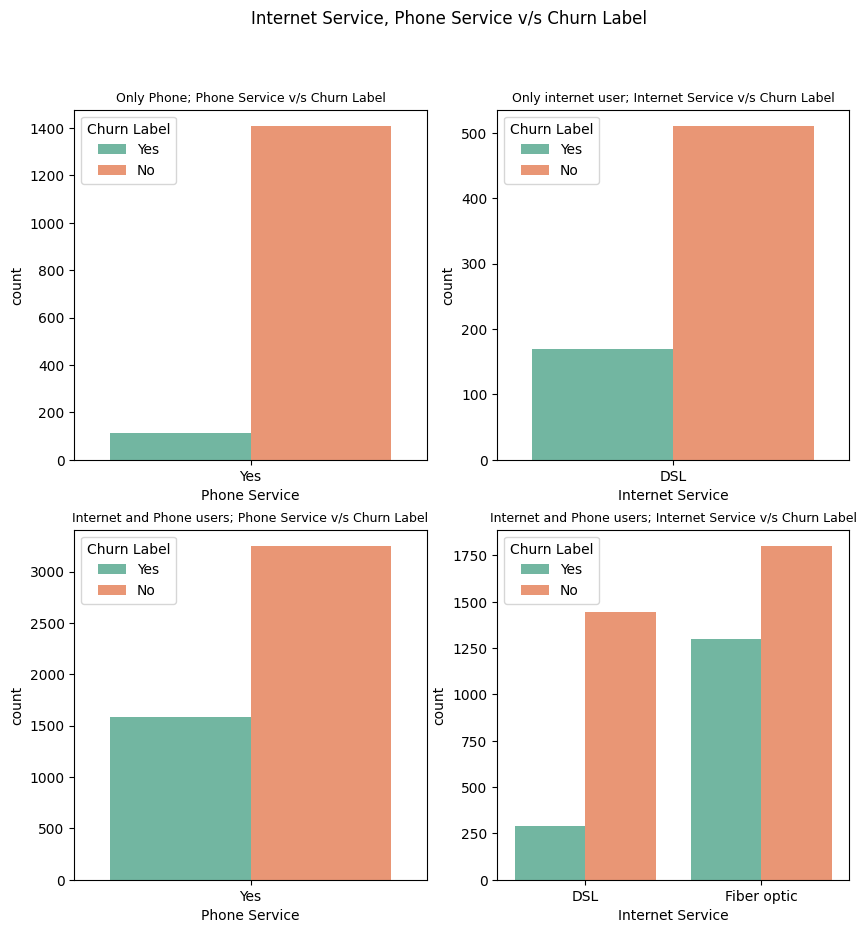

In [31]:
fontsz = 9
fig, axes = plt.subplots(2,2, figsize = (10,10))
axes = axes.flatten()
fig.suptitle('Internet Service, Phone Service v/s Churn Label')

sns.countplot(data = phone_only_df, x = 'Phone Service', hue = 'Churn Label', ax = axes[0], palette='Set2')
axes[0].set_title('Only Phone; Phone Service v/s Churn Label', fontsize = fontsz)

sns.countplot(data = internet_only_df, x = 'Internet Service', hue = 'Churn Label', ax = axes[1], palette='Set2')
axes[1].set_title('Only internet user; Internet Service v/s Churn Label', fontsize = fontsz)

sns.countplot(data = internet_and_phone_df, x = 'Phone Service', hue = 'Churn Label', ax = axes[2], palette='Set2')
axes[2].set_title('Internet and Phone users; Phone Service v/s Churn Label', fontsize = fontsz)

sns.countplot(data = internet_and_phone_df, x = 'Internet Service', hue = 'Churn Label', ax = axes[3], palette='Set2')
axes[3].set_title('Internet and Phone users; Internet Service v/s Churn Label', fontsize = fontsz)

plt.show()

OBSERVATIONS:
-   People who have opted for only Phone Service have Lowest Churn Rate
    -   This Suggests that the phone service provided by the company is upto the mark
-   People who have opted for Only Internet connection can only have DSL.
-   Phone connection is required for Opting for Fibre Optic

# Feature Selection

In [12]:
df.drop(columns=["Latitude","Longitude","Lat Long","Country","State","Churn Value","Count","City","CustomerID","Churn Reason"],inplace=True)

In [13]:
df.nunique()

Zip Code             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          72
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn Label             2
Churn Score            85
CLTV                 3435
dtype: int64

In [14]:
for i in df.columns:
    if "No phone service" in df[i].unique():
        df[i].replace(["No phone service"],["No"],inplace=True)
    elif "No internet service" in df[i].unique():
        df[i].replace(["No internet service"],["No"],inplace=True)

C:\Users\sanid\AppData\Local\Temp\ipykernel_26612\1516949102.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "No phone service" in df[i].unique():
C:\Users\sanid\AppData\Local\Temp\ipykernel_26612\1516949102.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif "No internet service" in df[i].unique():


In [15]:
for col in df.columns:
    if df[col].dtype=="object":
        table=pd.crosstab(df['Churn Label'],df[col])
        stat, pvalue, dof, expec = chi2_contingency(table)
        conf=0.05
        if pvalue<=conf:
            print(col,"is significantly affecting target, P-value=",pvalue)
        else:
            print(col, "is useless, P-value=",pvalue)

Gender is useless, P-value= 0.490488470706551
Senior Citizen is significantly affecting target, P-value= 2.4792557203954705e-36
Partner is significantly affecting target, P-value= 3.97379757451591e-36
Dependents is significantly affecting target, P-value= 7.098585363102037e-96
Phone Service is useless, P-value= 0.34992398942431924
Multiple Lines is significantly affecting target, P-value= 0.0008694082815826175
Internet Service is significantly affecting target, P-value= 5.831198962236941e-159
Online Security is significantly affecting target, P-value= 1.37424000884718e-46
Online Backup is significantly affecting target, P-value= 6.259257129714726e-12
Device Protection is significantly affecting target, P-value= 3.346074945648779e-08
Tech Support is significantly affecting target, P-value= 3.2328683255491206e-43
Streaming TV is significantly affecting target, P-value= 1.3164336109407092e-07
Streaming Movies is significantly affecting target, P-value= 3.857900347663822e-07
Contract is si

In [90]:
# df.columns[i for i in df.columns[df.dtypes =='int64'] or]
# df[(df["Churn Label"]=='Yes') & (df['Churn Label']=='No')] 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


In [16]:
df.groupby(["Churn Label","Gender"])["Gender"].count()

Churn Label  Gender
No           Female    2544
             Male      2619
Yes          Female     939
             Male       930
Name: Gender, dtype: int64

In [17]:
# df.drop(columns=["Gender"],inplace=True)

In [18]:
cateogorical_columns =  ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

In [19]:
# sns.scatterplot(df["Monthly Charges"],df["Churn Score"],hue=df["Churn Label"],style=df["Churn Label"],alpha=0.3)
# sns.scatterplot(data = df,x = 'Monthly Charges',y = 'Churn Score',hue=df["Churn Label"],style=df["Churn Label"],alpha=0.3)


In [20]:
df.groupby(["Churn Label"])["Churn Score"].mean()

Churn Label
No     50.101491
Yes    82.510433
Name: Churn Score, dtype: float64

In [21]:
# df["Churn Reason"].value_counts()

In [22]:
df.nunique()

Zip Code             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          72
Phone Service           2
Multiple Lines          2
Internet Service        3
Online Security         2
Online Backup           2
Device Protection       2
Tech Support            2
Streaming TV            2
Streaming Movies        2
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn Label             2
Churn Score            85
CLTV                 3435
dtype: int64

In [23]:
df.dtypes

Zip Code               int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Score            int64
CLTV                   int64
dtype: object

In [24]:
df["Churn Label"].unique()

array(['Yes', 'No'], dtype=object)

In [25]:

df.drop(index = df[df['Total Charges'] == " "].index, inplace=True)

In [26]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [27]:
df['Churn Label'].replace({"Yes":1, "No":0}, inplace=True)

In [28]:

cateogorical_columns =  ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


In [29]:
df= pd.get_dummies(df,drop_first=True, dtype= int)

In [30]:
df

,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,...,Device Protection_Yes,Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,90003,2,53.85,108.15,1,86,3239,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,90005,2,70.70,151.65,1,67,2701,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,90006,8,99.65,820.50,1,86,5372,0,0,0,...,1,0,1,1,0,0,1,0,1,0
3,90010,28,104.80,3046.05,1,84,5003,0,0,1,...,1,1,1,1,0,0,1,0,1,0
4,90015,49,103.70,5036.30,1,89,5340,1,0,0,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,92285,72,21.15,1419.40,0,45,5306,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7039,92301,24,84.80,1990.50,0,59,2140,1,0,1,...,1,1,1,1,1,0,1,0,0,1
7040,92304,72,103.20,7362.90,0,71,5560,0,0,1,...,1,0,1,1,1,0,1,1,0,0
7041,92305,11,29.60,346.45,0,59,2793,0,0,1,...,0,0,0,0,0,0,1,0,1,0


# Model Building

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Churn Label', axis = 1),df['Churn Label'], stratify= df['Churn Label'], random_state= 8, test_size=0.25)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [33]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c

RandomForestClassifier()

In [34]:
preds = rf.predict(x_test)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [35]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1301
           1       0.85      0.87      0.86       457

    accuracy                           0.93      1758
   macro avg       0.90      0.91      0.90      1758
weighted avg       0.93      0.93      0.93      1758



c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Pytho

In [53]:
rf_hyperparams = {
    'max_depth': range(2, 25, 3),
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    }
{}

{}

In [54]:
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_hyperparams,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)

In [55]:
rf_grid_search.fit(x_train, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Pytho

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'max_depth': range(2, 25, 3),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='roc_auc', verbose=True)

In [56]:
rf_best = rf_grid_search.best_estimator_

In [57]:
rf_best.fit(x_train, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c

RandomForestClassifier(max_depth=11, max_features='auto', n_estimators=450)

In [58]:
preds = rf_best.predict(x_test)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [59]:
print(classification_report(preds, y_test))

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Pytho

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1302
           1       0.85      0.87      0.86       456

    accuracy                           0.93      1758
   macro avg       0.90      0.91      0.91      1758
weighted avg       0.93      0.93      0.93      1758



In [36]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
preds = xgb.predict(x_test)

In [38]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1292
           1       0.84      0.85      0.84       466

    accuracy                           0.92      1758
   macro avg       0.89      0.89      0.89      1758
weighted avg       0.92      0.92      0.92      1758



c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Pytho

In [40]:
xgb_hyperparams = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(50, 500, 50),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [41]:
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_hyperparams,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)

In [47]:
xgb_grid_search.fit(x_train, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Pytho

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(50, 500, 50)},
             scoring='roc_auc', verbose=True)

In [48]:
xgb_best = xgb_grid_search.best_estimator_

In [49]:
xgb_best.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
preds = xgb_best.predict(x_test)

In [51]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1282
           1       0.87      0.86      0.87       476

    accuracy                           0.93      1758
   macro avg       0.91      0.91      0.91      1758
weighted avg       0.93      0.93      0.93      1758



c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Pytho